<a href="https://colab.research.google.com/github/Himanshu-Gupta-Dev/OIBSIP/blob/main/sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name:Himanshu Gupta

Organization:ORGANIZATION INFOBYTE<br>
Task3:


Sales prediction means predicting how much of a product people will buy based on factors
such as the amount you spend to advertise your product, the segment of people you
advertise for, or the platform you are advertising on about your product.



Typically, a product and service-based business always need their Data Scientist to predict
their future sales with every step they take to manipulate the cost of advertising their
product. So let’s start the task of sales prediction with machine learning using Python.



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving Advertising.csv to Advertising.csv
User uploaded file "Advertising.csv" with length 5166 bytes


In [ ]:
data=pd.read_csv("Advertising.csv")

In [ ]:
# Extract features (TV, Radio, Newspaper) and target variable (Sales)
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create a linear regression model
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions using the testing set
y_pred = model.predict(X_test)

In [ ]:
# Calculate and print the metrics
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

Mean Squared Error: 3.1740973539761033
R-squared: 0.899438024100912


In [ ]:
# Predict sales for a new data point
new_data = pd.DataFrame({'TV': [100], 'Radio': [25], 'Newspaper': [10]})
predicted_sales = model.predict(new_data)
print('Predicted Sales:', predicted_sales)

Predicted Sales: [12.20950658]


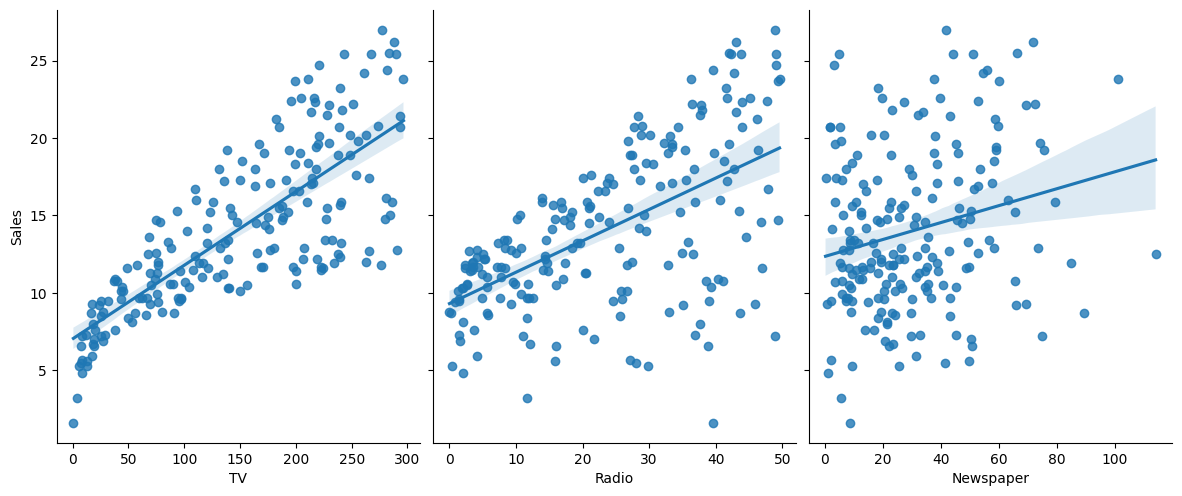

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=5, aspect=0.8, kind='reg')
plt.show()


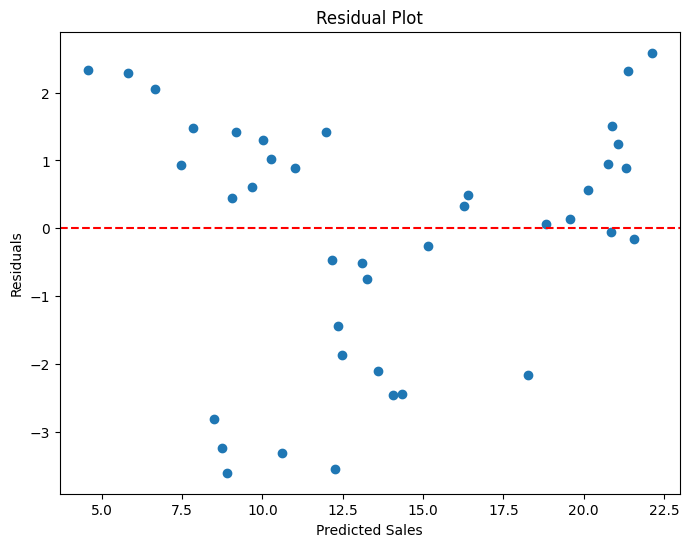

In [ ]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.show()


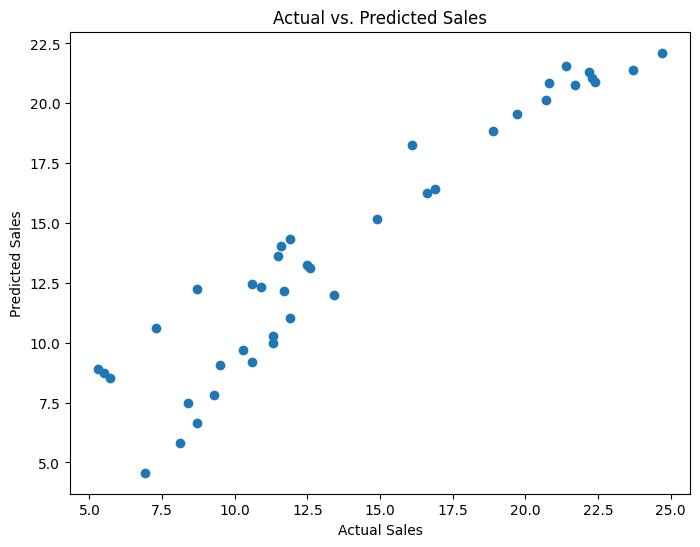

In [ ]:
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=5, aspect=0.8, kind='reg')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.show()


<h6>Feature Importance Plot (for Linear Regression):

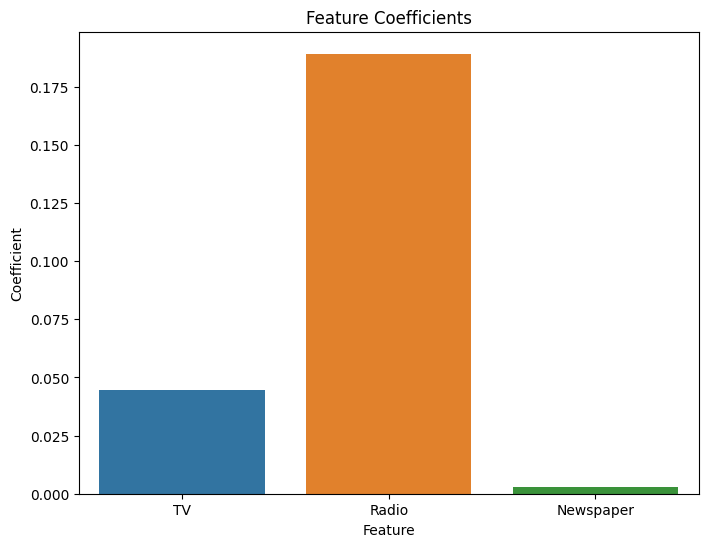

In [ ]:
coefficients = pd.DataFrame({
    'Feature': ['TV', 'Radio', 'Newspaper'],
    'Coefficient': model.coef_
})

plt.figure(figsize=(8, 6))
sns.barplot(x='Feature', y='Coefficient', data=coefficients)
plt.title('Feature Coefficients')
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model using scaled features
model.fit(X_train_scaled, y_train)


LinearRegression()

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# Select top k features using SelectKBest with f_regression as score function
selector = SelectKBest(score_func=f_regression, k='all')
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Train the model using selected features
model.fit(X_train_selected, y_train)


LinearRegression()

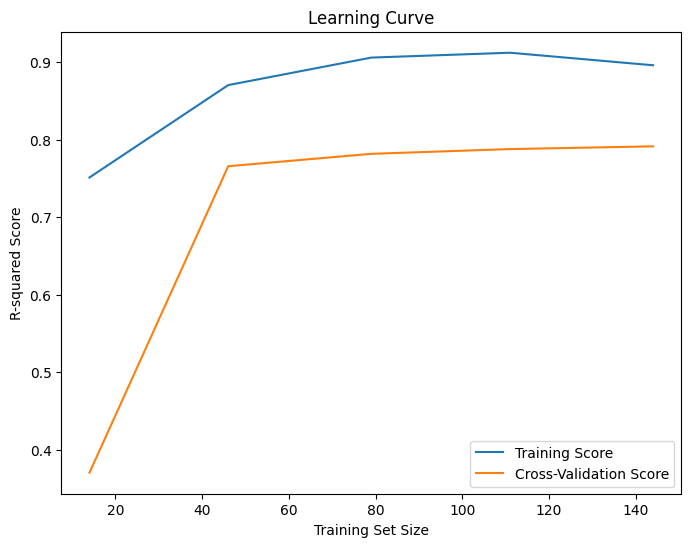

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X_train_selected, y_train, cv=10)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Cross-Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('R-squared Score')
plt.title('Learning Curve')
plt.legend()
plt.show()
